# Curve fit example

In [69]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = 15, 10 
plt.rcParams['lines.markersize'] = 10
plt.rcParams['lines.linewidth'] = 4

plt.rcParams['font.size'] = 15

import numpy as np
from scipy.optimize import curve_fit
import inspect
import pandas as pd

## Specifying the function that should be fitted
This function could do just about anything, as long as it uses the input x and parameters: m, A and B etc. to produce some output y.

$ y = m + A \cdot x + B \cdot x^{2.5}$

In [70]:
def equation(x,m,A,B):
    
    y = m + A*x + B*x**2.5 #This is the actual function
    
    return y

In [71]:
def get_derivatives(coefficients,equation):
    derivatives = {}
    a = inspect.getargspec(equation)
    for coefficient_name,value in zip(a.args[1:],coefficients):
        derivatives[coefficient_name] = value
        
    return derivatives

In [72]:
N = 500;
x = np.linspace(start = 0, stop = 1,num = N)
m = 10
A = 1
B = 2

y = equation(x = x,m = m,A = A,B = B)

mu = 0
sigma = 1

noice = mu + sigma*(1 - 2*np.random.rand(N))
y_distorted = y + noice

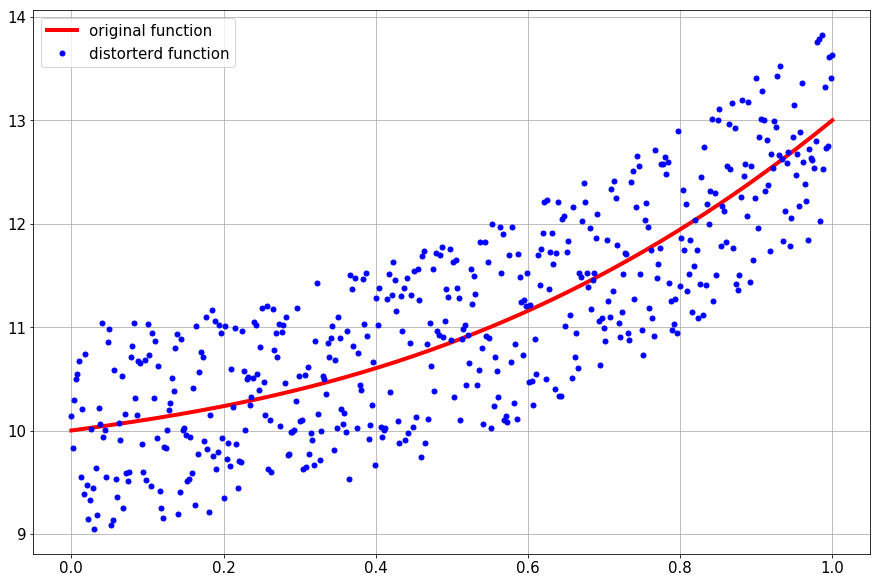

In [73]:
fig,ax = plt.subplots()

ax.plot(x,y,'r-',label = 'original function')
a = ax.plot(x,y_distorted,'b.',label ='distorterd function')
ax.legend()
ax.grid()


## Regression

In [74]:
coefficients, fitCovariances = curve_fit(f = equation, xdata = x, ydata = y_distorted)
coefficients

array([ 9.9641402 ,  1.27233044,  1.6928117 ])

In [75]:
derivatives = get_derivatives(coefficients = coefficients,equation = equation)
derivatives

c:\dev\curve_fit\venv\lib\site-packages\ipykernel\__main__.py:3: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  app.launch_new_instance()


{'A': 1.272330439267523, 'B': 1.6928117038259927, 'm': 9.9641402004764448}

## Predict

In [76]:
y_pred = equation(x = x,**derivatives)

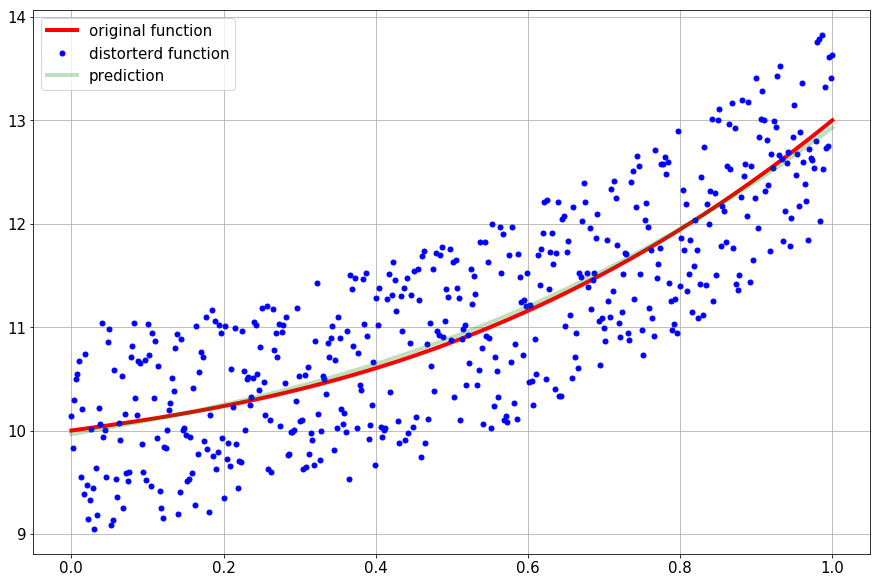

In [81]:
fig,ax = plt.subplots()

ax.plot(x,y,'r-',label = 'original function')
a = ax.plot(x,y_distorted,'b.',label ='distorterd function')
a = ax.plot(x,y_pred,'g-',label = 'prediction',alpha = 0.25)

ax.legend()
ax.grid()




We can easily fit another function to the same data:

$ y = m + A \cdot x $

In [52]:
def equation_linear(x,m,A):
    
    y = m + A*x 
    
    return y

In [53]:
coefficients_linear, fitCovariances_linear = curve_fit(f = equation_linear, xdata = x, ydata = y_distorted)
derivatives_linear = get_derivatives(coefficients = coefficients_linear,equation = equation_linear)
y_pred_linear = equation_linear(x = x,**derivatives_linear)

c:\dev\curve_fit\venv\lib\site-packages\ipykernel\__main__.py:3: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  app.launch_new_instance()


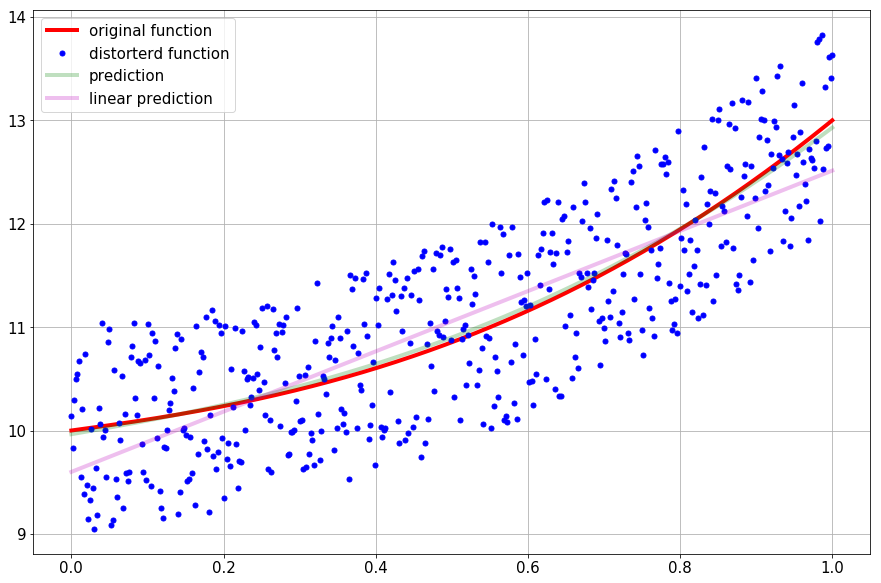

In [82]:
fig,ax = plt.subplots()

ax.plot(x,y,'r-',label = 'original function')
a = ax.plot(x,y_distorted,'b.',label ='distorterd function')
a = ax.plot(x,y_pred,'g-',label = 'prediction',alpha = 0.25)
a = ax.plot(x,y_pred_linear,'m-',label = 'linear prediction',alpha = 0.25)

ax.legend()
ax.grid()